#### Name: Praanesh Balakrishnan Nair
#### Roll No. BL.EN.U4AIE23123


1. For the given tree apply the BFS algorithm to calculate the time and space 
complexity required in order to reach node K. Compare the same with DFS. <br><br>
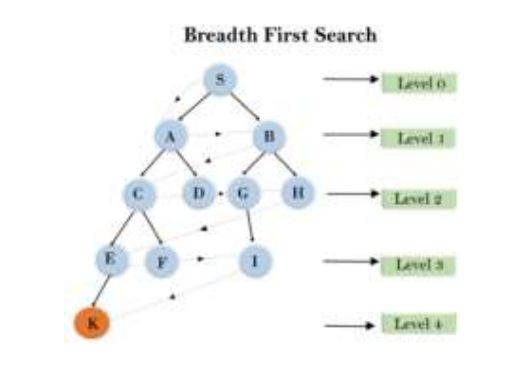

In [36]:
from Python032graphs006breadthFirstSearch import breadthFirstSearch
from Python033graphs007depthFirstSearch import depthFirstSearch
from Python029graphs003adjacencyList import Graph

graph = Graph(['S','A','B','C','D', 'G','H','E','F','I','K'])
graph.add_edge('S','A')
graph.add_edge('S','B')
graph.add_edge('A','C')
graph.add_edge('A','D')
graph.add_edge('B','G')
graph.add_edge('B','H')
graph.add_edge('C','E')
graph.add_edge('C','F')
graph.add_edge('G','I')
graph.add_edge('E','K')


bfs=breadthFirstSearch(graph.graph, 'A')
for i in bfs:
    if i == 'K':
        print(f"(({i}))", end=' ')
    else:
        print(i, end=' ')


print();print()


Dfs=depthFirstSearch(graph.graph, 'S')
for i in Dfs:
    if i == 'K':
        print(f"(({i}))", end=' ')
    else:
        print(i, end=' ')

print();print()







A S C D B E F G H ((K)) I 

S B H G I A D C F E ((K)) 



In [37]:
V = list(graph.graph.keys()).index('K') + 1
E = sum(len(edges) for edges in graph.graph.values())
print(f"BFS Time Complexity: O({V} + {E})")
print(f"BFS Space Complexity: O({V})")
print(f"DFS Time Complexity: O({V} + {E})")
print(f"DFS Space Complexity: O({V})")

BFS Time Complexity: O(11 + 20)
BFS Space Complexity: O(11)
DFS Time Complexity: O(11 + 20)
DFS Space Complexity: O(11)


2. For the given tree apply the DFS algorithm to calculate the time and space 
complexity required in order to reach node G. Compare the same with BFS. <br><br>
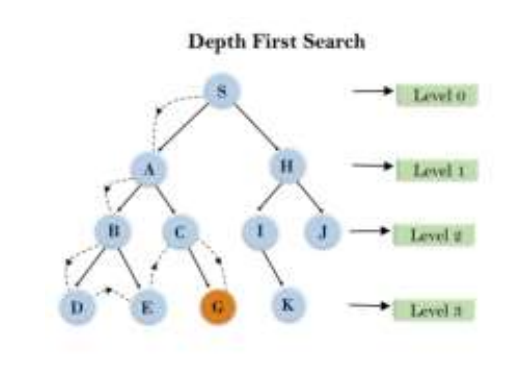

In [38]:
graph = Graph(['S','A','H','B','C','I','J','D','E','G','K'])
graph.add_edge('S','A')
graph.add_edge('S','H')
graph.add_edge('A','B')
graph.add_edge('A','C')
graph.add_edge('H','I')
graph.add_edge('H','J')
graph.add_edge('B','D')
graph.add_edge('B','E')
graph.add_edge('C','G')
graph.add_edge('I','K')
bfs=breadthFirstSearch(graph.graph, 'S')


for i in bfs:
    if i == 'G':
        print(f"(({i}))", end=' ')
    else:
        print(i, end=' ')

print();print()

Dfs=depthFirstSearch(graph.graph, 'S')
for i in Dfs:
    if i == 'G':
        print(f"(({i}))", end=' ')
    else:
        print(i, end=' ')


S A H B C I J D E ((G)) K 

S H J I K A C ((G)) B E D 

In [39]:
V = list(graph.graph.keys()).index('G') + 1
E = sum(len(edges) for edges in graph.graph.values())
print(f"BFS Time Complexity: O({V} + {E})")
print(f"BFS Space Complexity: O({V})")
print(f"DFS Time Complexity: O({V} + {E})")
print(f"DFS Space Complexity: O({V})")

BFS Time Complexity: O(10 + 20)
BFS Space Complexity: O(10)
DFS Time Complexity: O(10 + 20)
DFS Space Complexity: O(10)


3. For the given tree apply the DLS algorithm to calculate the time and space 
complexity required in order to reach node J.

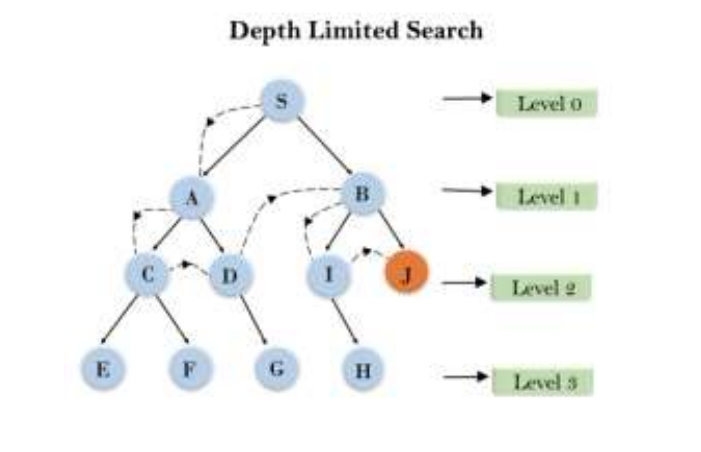

In [52]:
def main():
    adjacent_list = {
        'S': ['A', 'B'],
        'A': ['C', 'D'],
        'B': ['I', 'J'],
        'C': ['E', 'F'],
        'D': ['G'],
        'I': ['H'],
        'E': [],
        'F': [],
        'G': [],
        'J': [],
        'H': []
    }

    start_node = 'S'
    goal = 'J'
    limit = 2
    result, time_complexity, space_complexity = depth_limited_search(adjacent_list, start_node, goal, limit)
    
    print();print()
    
    if result:
        print(f"Goal node '{goal}' found.")
    else:
        print(f"Goal node '{goal}' not found within depth limit.")

    print(f"Traversal: {result}")
    print(f"Time Complexity: {time_complexity}")
    print(f"Space Complexity: {space_complexity}")


def depth_limited_search(graph, start_node, goal, limit):
    visited_nodes = []

    def dls(current_node, goal, limit):
        visited_nodes.append(current_node)
        print(current_node, end=' ') 
        if current_node == goal:
            return current_node
        if limit <= 0:
            return None
        for child in graph.get(current_node, []):
            result = dls(child, goal, limit - 1)
            if result is not None:
                return result
        return None

    result = dls(start_node, goal, limit)
    time_complexity = len(visited_nodes)
    space_complexity = limit
    return result, time_complexity, space_complexity


if __name__ == "__main__":
    main()

S A C D B I J 

Goal node 'J' found.
Traversal: J
Time Complexity: 7
Space Complexity: 2


4. For the given tree apply the UCS algorithm to calculate the time and space 
complexity required in order to reach node G.

In [ ]:
import heapq

def uniform_cost_search(graph, start, goal):
    frontier = []  # Priority queue to store nodes to explore
    heapq.heappush(frontier, (0, start, [start]))  # (cost, node, path)
    explored = set()  # Set to store explored nodes

    while frontier:
        cost, current, path = heapq.heappop(frontier)
        
        if current == goal:
            return path, cost
        
        if current in explored:
            continue
        
        explored.add(current)
        
        for neighbor, neighbor_cost in graph[current].items():
            new_cost = cost + neighbor_cost
            heapq.heappush(frontier, (new_cost, neighbor, path + [neighbor]))
    
    return None, None  # No path found

# Example usage:
graph = { 
    'A': {'B': 1, 'C': 4}, 
    'B': {'A': 1, 'D': 2, 'E': 5}, 
    'C': {'A': 4, 'F': 3}, 
    'D': {'B': 2, 'G': 6}, 
    'E': {'B': 5, 'G': 2}, 
    'F': {'C': 3, 'G': 1}, 
    'G': {'D': 6, 'E': 2, 'F': 1}
} 
start_node = 'A' 
goal_node = 'G' 

# Call the uniform_cost_search function
path, cost = uniform_cost_search(graph, start_node, goal_node) 

# Output the result
if path: 
    print("Shortest path:", path) 
    print("Total cost:", cost) 
else: 
    print("No path found.")

### Python032graphs006breadthFirstSearch

In [ ]:
import Python029graphs003adjacencyList


    
def depthLimitedSearch(graph, start, goal, limit):
    visited = set()
    return recursiveDLS(graph, start, goal, limit, visited)

def recursiveDLS(graph, current, goal, limit, visited):
    if current == goal:
        return True
    if limit <= 0:
        return False
    visited.add(current)
    for neighbor in graph[current]:
        if neighbor not in visited:
            if recursiveDLS(graph, neighbor, goal, limit-1, visited):
                return True
    return False


### Python033graphs007depthFirstSearch

In [ ]:
import Python029graphs003adjacencyList

def depthFirstSearch(graph, start):
    stack = [start]
    visited = []

    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.append(vertex)
            stack.extend(neighbor for neighbor, _ in graph[vertex] if neighbor not in visited)
            # add all of the neighbours to the stack 👆
    return visited


### Python039graphs009depthLimitedSearch


In [ ]:
import Python029graphs003adjacencyList

  
def depthLimitedSearch(graph, start, limit):
    stack = [(start, 0)]
    visited = []
    
    while stack:
        vertex, depth = stack.pop()
        if vertex not in visited and depth < limit:
            visited.append(vertex)
            stack.extend((neighbor, depth + 1) for neighbor, _ in graph[vertex] if neighbor not in visited)
    return visited


### Python029graphs003adjacencyList

In [ ]:
# implementation of graphs using adjacency list

class Graph:    
    # Overall Structure:
    # graph is a dictionary: key=vertex, value=list of edges
    # Each edge is a tuple (vertex, weight)
    
    def __init__(self, vertices): # vertices is a list of vertices. Each vertex is a number/character.
        self.graph = {}
        for vertex in vertices:
            self.graph[vertex] = []
            
    def __str__(self):
        result = ""
        for vertex in self.graph:
            result += f"{vertex}: "
            for edge in self.graph[vertex]:
                result += f"{edge[0]}({edge[1]}) "
            result += "\n"
        return result
    
    def add_edge(self, u, v, weight=1):
        self.graph[u].append((v, weight))
        self.graph[v].append((u, weight))
        
    def remove_edge(self, u, v):
        self.graph[u] = [edge for edge in self.graph[u] if edge[0] != v]
        self.graph[v] = [edge for edge in self.graph[v] if edge[0] != u]
    
    def has_selfLoop(self):
        for vertex in self.graph:
            for edge in self.graph[vertex]:
                if vertex == edge[0]:
                    return True
        return False
